In [171]:
"""
Refer to "ForestFireDataAnalysis.ipynb" for data visualization and "ForestFirePredictiveModel" for model
based on previous data.
The dataset used in this file is from another paper and is to be considered seperately from the previous work.

Purpose: create a predictive model for detecting forest fires using a sample of training / testing images
"""

# Data handling
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt

In [172]:
# Access directory with testing and training images
import os
testing_directory_path = "/Users/sasha/Desktop/ForestFireDataProject/Forest Fire Dataset/Testing"
training_fire_directory_path = "/Users/sasha/Desktop/ForestFireDataProject/Forest Fire Dataset/Training/fire"
training_nofire_directory_path = "/Users/sasha/Desktop/ForestFireDataProject/Forest Fire Dataset/Training/nofire"

# Package images into numpy arrays
def package_fire_dataset(directory, is_fire_image):
    image_urls = []
    for path in os.listdir(directory):
        if is_fire_image:
            if path[0] == 'f':
                image_urls.append(path)
        else:
            if path[0] == 'n':
                image_urls.append(path)

    return image_urls

testing_images = package_fire_dataset(testing_directory_path, True)
training_fire_images = package_fire_dataset(training_fire_directory_path, True)
training_nofire_images = package_fire_dataset(training_nofire_directory_path, False)

In [173]:
# Image handling library (Pillow)
from PIL import Image
pic = Image.open('Forest Fire Dataset/Training/fire/fire_0003.jpg')

In [174]:
pic_arr = np.asarray(pic)
pic_arr.shape
type(pic_arr)

numpy.ndarray

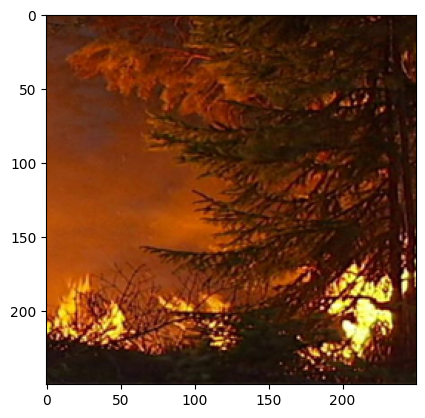

In [175]:
plt.imshow(pic_arr[:,:,:])

In [176]:
# Machine learning libraries
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Parameters for model
batch_size = 32
img_height = 250
img_width = 250

In [183]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  testing_directory_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  labels=None
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  testing_directory_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  labels=None
)


Found 381 files belonging to 1 classes.
Using 305 files for training.
Found 381 files belonging to 1 classes.
Using 76 files for validation.


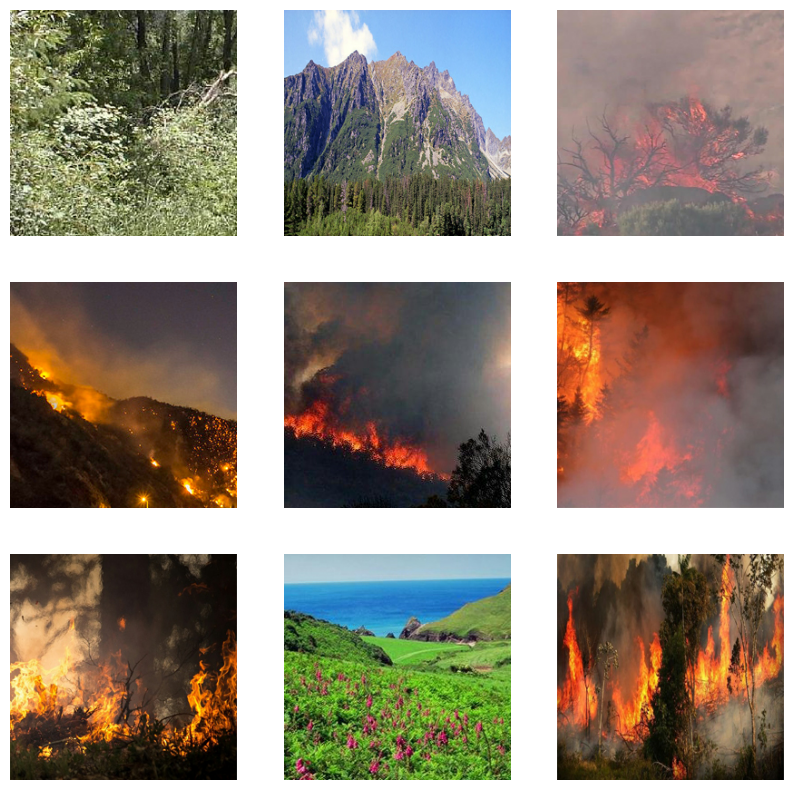

In [184]:
plt.figure(figsize=(10, 10))
for images in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [185]:
# Configure dataset for performance with cacheing and prefetching data
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [186]:
# Rescale RGB values to fit in 0-1 range instead of 0-255
normalization_layer = layers.Rescaling(1./255)
